# Решение задачи Коши


In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [148]:
def runge_kutta(t0, T,n, x0, y0, f, g):
    h = (T- t0)/(n)
    x, y = [x0], [y0]
    for i in range(n):
        t_i, x_i, y_i = t0 + i*h,x[-1], y[-1]
        k_1, k_2 = [h*f(t_i, x_i, y_i)], [h*g(t_i, x_i, y_i)]
        for j in range(2):
            k_1.append(h * f(t_i + h/2, x_i + k_1[-1] / 2, y_i + k_2[-1] / 2))
            k_2.append(h * g(t_i + h/2,x_i + k_1[-2] / 2, y_i + k_2[-1] / 2))
        k_1.append(h * f(t_i + h, x_i + k_1[-1], y_i + k_2[-1]))
        k_2.append(h * g(t_i + h,x_i + k_1[-2], y_i + k_2[-1]))
        x.append(x_i + np.average(k_1, weights=[1., 2, 2, 1]))
        y.append(y_i + np.average(k_2, weights=[1., 2, 2, 1]))

    return x, y

## Тестируем: 

Рассмотрим следующую систему:
$$
\begin{equation*}
    \begin{cases}
   \dfrac{dx}{dt} = -y
   \\
   \dfrac{dy}{dt} = x
   \\
   x(0) = 1 \\
   y(0) = 0
     \end{cases}
\end{equation*}
$$

Аналитически решая, получим:

$$
\begin{equation*}
    \begin{cases}
    x(t) =  cos(t)
    \\
    y(t) =  sin(t)
    \end{cases}
\end{equation*}
$$

In [112]:
def dx(x,y,z):
    return -z
def dy(x,y,z):
    return y

In [153]:
def real_x(t):
    return np.cos(t)
def real_y(t):
    return np.sin(t)

In [154]:
n = 100
t = np.linspace(0,2, n+1)
a, b = 0,2
x0, y0 = 1, 0

In [155]:
x, y = runge_kutta(a, b, n, x0, y0, dx,dy)

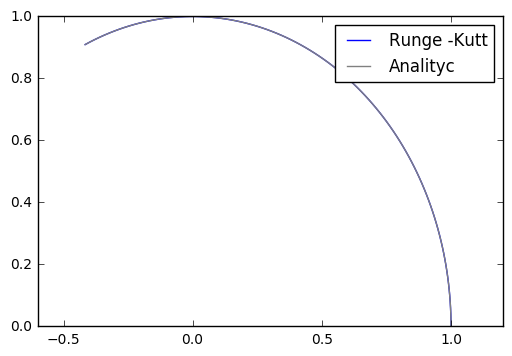

In [157]:

plt.plot(x, y, label='Runge -Kutt')
plt.plot(real_x(t),real_y(t), label = 'Analityc', color = 'grey', )
plt.legend()

### Построим график ошибки:

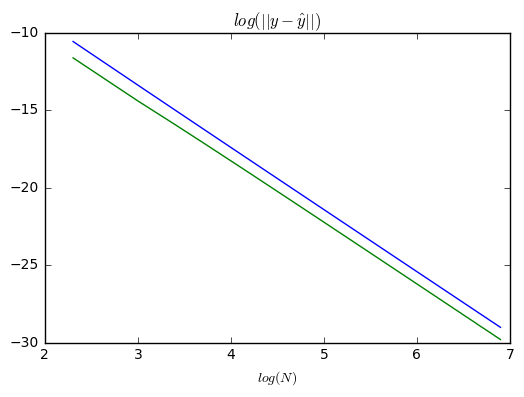

In [161]:
cheb_x = []
cheb_y = []
grid = np.arange(10, 1000, 10)
for N in n_grid:
    h = (b-a) / N
    t = a + np.array(range(N+1))*h
    x, y = runge_kutta(a, b, N, x0, y0, dx,dy)
    cheb_x.append(np.max(np.abs(x - real_x(t))))
    cheb_y.append(np.max(np.abs(y - real_y(t))))

plt.plot(np.log(grid), np.log(cheb_x))
plt.title('$log(|| x - \hat{x} ||)$')
plt.xlabel('$log(N)$')

plt.plot(np.log(grid), np.log(cheb_y))
plt.title('$log(|| y - \hat{y} ||)$')
plt.xlabel('$log(N)$')

### Построим векторное поле:

In [163]:
n = 100
t = np.linspace(0,2, n+1)
x, y = runge_kutta(a, b, n, x0, y0, dx,dy)

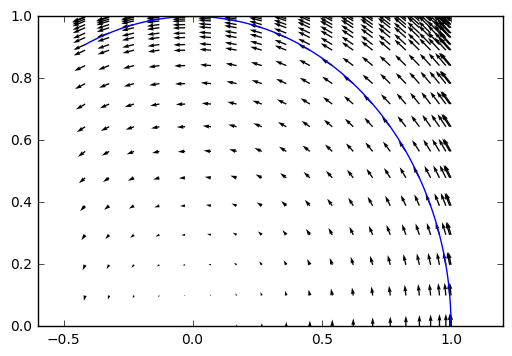

In [164]:
X, Y = np.meshgrid(x[::5], y[::5])
U = dx(0, X, Y)
V = dy(0, X, Y)
plt.quiver(X, Y, U, V)
plt.plot(x, y)